# **Feature Matching**
In this notebook, we will see how to extract SIFT(Scale-Invariant Feature Transform) and match SIFT features of two images with OpenCV-Python.

---

In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 2.0 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 43.5 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import numpy as np
import cv2 # OpenCV-Python
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [3]:
!wget -O beaver.png "https://drive.google.com/u/1/uc?id=1QJqZtlLq8xbfeKRBI3gL49CpPCHr6vmS&export=download"

--2022-05-17 06:57:25--  https://drive.google.com/u/1/uc?id=1QJqZtlLq8xbfeKRBI3gL49CpPCHr6vmS&export=download
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.113, 142.251.8.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1QJqZtlLq8xbfeKRBI3gL49CpPCHr6vmS&export=download [following]
--2022-05-17 06:57:25--  https://drive.google.com/uc?id=1QJqZtlLq8xbfeKRBI3gL49CpPCHr6vmS&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aodh71tc4tr3oori1193f6dg3qikgk26/1652770575000/03995330158540788625/*/1QJqZtlLq8xbfeKRBI3gL49CpPCHr6vmS?e=download [following]
--2022-05-17 06:57:26--  https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mb

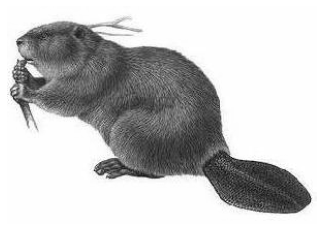

In [4]:
# Load an image
img = Image.open('beaver.png')
img = np.asarray(img)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# **Extract SIFT features from an image**

## **1. SIFT detector**

`sift = cv2.xfeatures2d.SIFT_create()` returns object 

---

needed for sift algorithm

In [5]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

`keypoint = sift.detect(img, mask)`:
- `input`
  - `img`: input image
  - `mask`: mask indicating a part of image to be searched in. **If you don't have mask, just pass `None`**

- `output`
  - `keypoint`: keypoints obtained 

In [6]:
# SIFT feature detection
start_time = time.time()
kp = sift.detect(img, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.037545s


`dst = cv2.drawKeypoints(img, keypoint, dst)`
- `input`
  - `img`: input image
  - `keypoint`: keypoints obtained
  - `dst`: if this is not None, algorithm overwrite results to dst

- `output`
  - `dst`: output image with keypoints

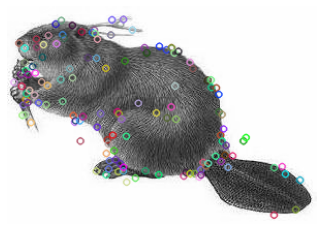

In [7]:
# Display the SIFT features
img_sift = cv2.drawKeypoints(img, kp, None)
plt.imshow(img_sift)
plt.axis('off')
plt.show()

In [8]:
# Inspect the keypoints
print(type(kp))
print(len(kp))

<class 'list'>
144


In [9]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print(kp[1].angle) # Orientation
print(kp[1].octave) # octave, & 0xFF
print(kp[1].pt) # Position
print(kp[1].response) # Strength
print(kp[1].size) # Scale

166.6825714111328
9700351
(11.191573143005371, 35.687068939208984)
0.0790688619017601
3.2590179443359375


## **2. Extract SIFT descriptor**

`kp, des = sift.compute(img, kp)`
- `input`
  - `img`: input image
  - `kp`: keypoints
- `output`
  - `kp`: keypoints
  - `des`: description (features)

In [10]:
# Extract SIFT feature from the image and detected keypoints
start_time = time.time()
kp, des = sift.compute(img, kp)
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.036038s


`kp, des = sift.detectAndCompute(img, mask)`
- `input`
  - `img`: input image
  - `mask`: mask indicating a part of image to be searched in. **If you don't have mask, just pass None**
- `output`
  - `kp`: keypoints from sift algorithm
  - `des`: description from sift algorithm

In [11]:
# SIFT keypoints and descriptors at the same time
start_time = time.time()
kp, des = sift.detectAndCompute(img, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.046884s


In [12]:
# Inspect the descriptors
print(type(des))
print(des.shape)
print(des.dtype)

<class 'numpy.ndarray'>
(144, 128)
float32


In [13]:
print(len(des[0, :]))
print(des[0, :])

128
[ 57.  42.  30.  40.  49.   1.   0.  20.  37.  35.  16.  29.  43.   2.
   6.  50.  19.  20.  14.   7.  11.  28.  37. 109.  65.   0.   0.   1.
   2.   7.  28. 150.  27.  40.  58.  50.  13.   0.   0.   9. 150.  34.
  24.  23.   5.   0.   8. 134.  50.   8.   3.   0.   0.   0.  51. 150.
   3.   0.   0.   0.   0.   1.  28.  95.  24.   5.  14.  31.  21.  16.
   9.  15. 150.  65.   3.   5.   2.   1.   7.  53. 150.  28.   0.   0.
   0.   0.   2.  45.   4.   0.   0.   0.   0.   1.   2.   7.  21.   2.
   1.   4.   9.  22.  22.  28. 150.  11.   0.   0.   0.   0.  11.  86.
 150.   7.   0.   0.   0.   0.   0.  31.   3.   0.   0.   0.   0.   0.
   0.   2.]


---

# **Feature Matching**

## **1. SIFT Feature Matchin**g

In [14]:
!wget -O box.png "https://drive.google.com/u/1/uc?id=1OQFY9JtrQiOHAvGds1_M8TluLVaJc48Y&export=download"
!wget -O box_in_scene.png "https://drive.google.com/u/1/uc?id=1B6kTwlbN7tj_lXO02pu2n-FOmf5g2iXc&export=download"

--2022-05-17 06:57:27--  https://drive.google.com/u/1/uc?id=1OQFY9JtrQiOHAvGds1_M8TluLVaJc48Y&export=download
Resolving drive.google.com (drive.google.com)... 142.251.8.100, 142.251.8.102, 142.251.8.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1OQFY9JtrQiOHAvGds1_M8TluLVaJc48Y&export=download [following]
--2022-05-17 06:57:28--  https://drive.google.com/uc?id=1OQFY9JtrQiOHAvGds1_M8TluLVaJc48Y&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/35o10503f6e5rco7st20kekn2sjue2ao/1652770575000/03995330158540788625/*/1OQFY9JtrQiOHAvGds1_M8TluLVaJc48Y?e=download [following]
--2022-05-17 06:57:29--  https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mb

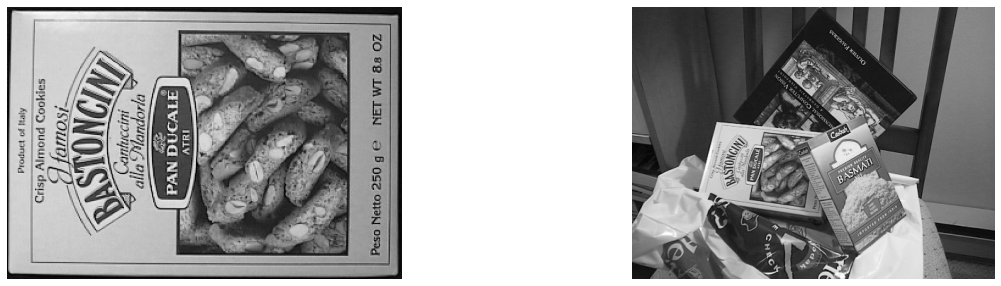

In [15]:
# Open and show images
gray1 = np.asarray(Image.open('box.png'))
gray2 = np.asarray(Image.open('box_in_scene.png'))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.222579s
Image 1 - 603 feature detected
Image 2 - 969 feature detected


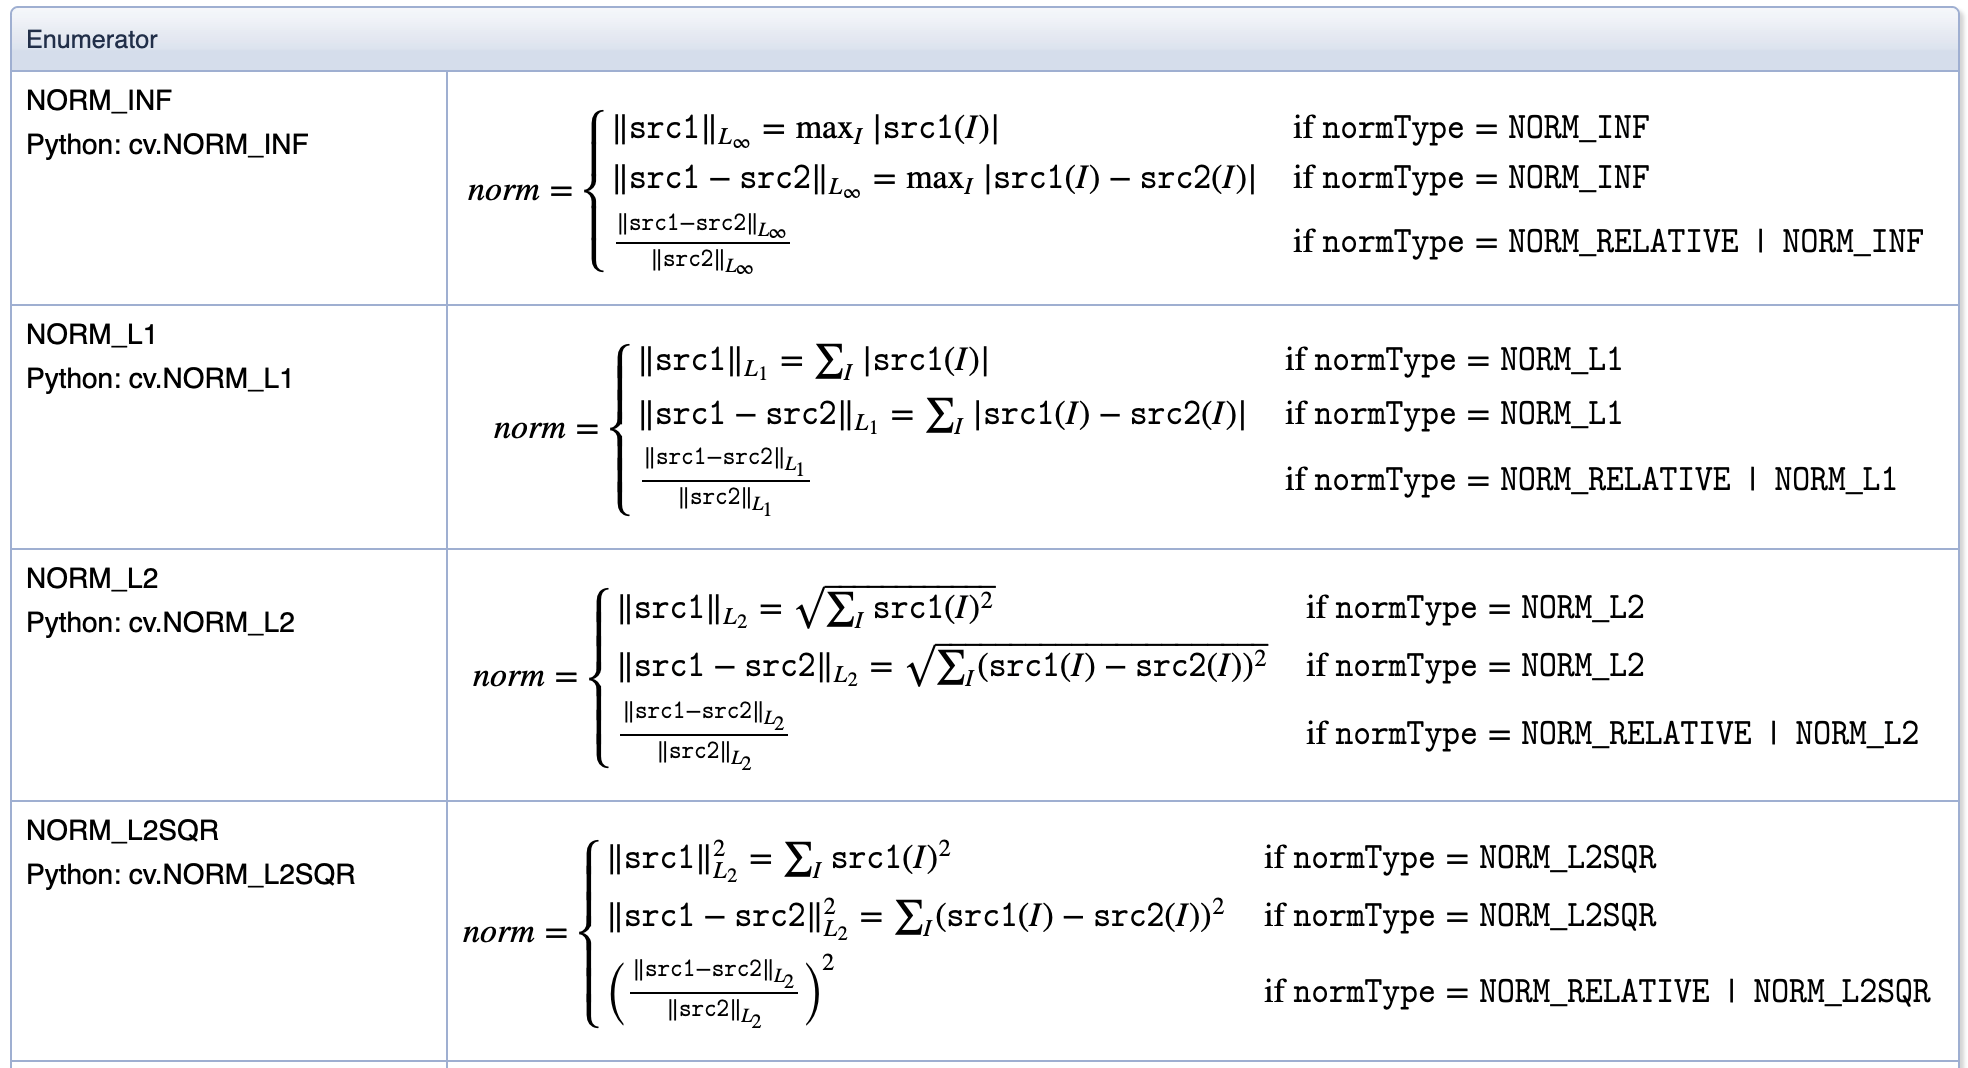

`bf = cv2.BFMatcher(normType=cv2.NORM_L2)`
- `input`
  - `normType`: normalizatio type to use for brute force matching. 
- `output`
  - `bf`: object for brute force matching

In [17]:
# BFMatcher(Brute Force Matcher) with default setting
bf = cv2.BFMatcher(cv2.NORM_L2)

`matches = bf.knnMatch(des_query, des_train, k)`
- `input`
  - `des1`: description of query image
  - `des2`: description of train image
  - `k`: for each of description points, how many closest points you want to find?
- `output`
  - `matches`: matched points

In [18]:
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

603 matches


In [19]:
# Inspect matcher results
print(type(matches))
print(len(matches))
print(type(matches[0]))
print(len(matches[0]))

<class 'list'>
603
<class 'list'>
2


In [20]:
print(type(matches[0][0]))
print(dir(matches[0][0]))

<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [21]:
print(matches[0][0].distance)
print(matches[0][0].queryIdx)
print(matches[0][0].trainIdx)
print(matches[0][0].imgIdx)
print(matches[0][1].distance)
print(matches[0][1].queryIdx)
print(matches[0][1].trainIdx)
print(matches[0][1].imgIdx)

212.0023651123047
0
336
0
256.8598937988281
0
717
0


In [22]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

79 matches


`dst = cv2.drawMatches(img1, kp1, img2, kp2, matches, dst)`
- `input`
  - `img1`: first input image 
  - `kp1`: keyponits of first input image
  - `img2`: second input image
  - `kp2`: keypoints of second input image
  - `matches`: match object obtained by bf.knnMatch
  - `dst`: if this is not None, algorithm overwrite results to dst

- `output`
  - `dst`: output image with keypoints

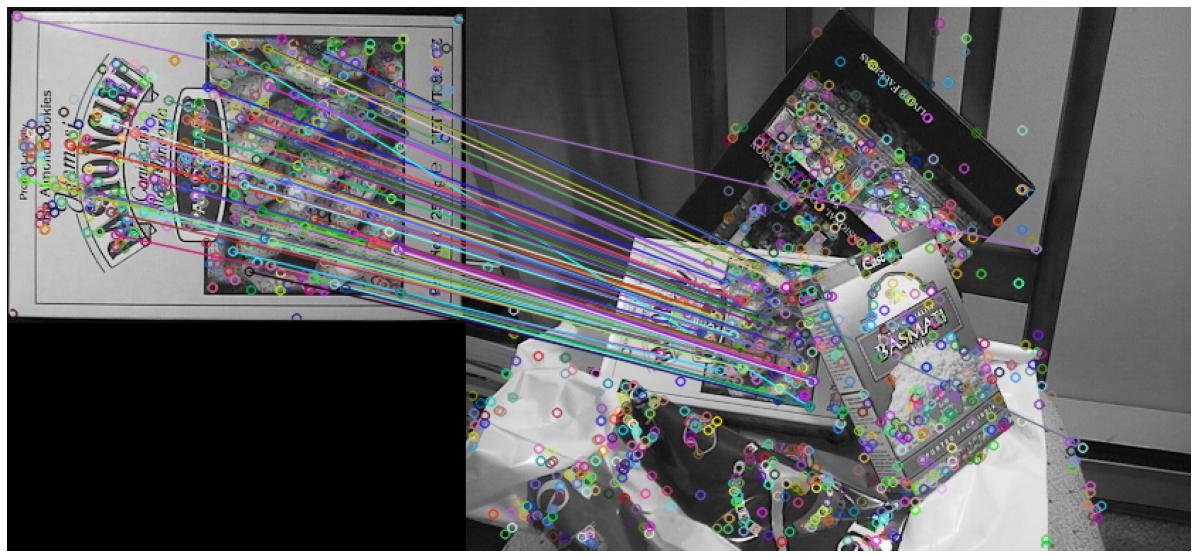

In [23]:
# Display matches
img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, good_matches, None)
plt.figure(figsize=(40, 10))
plt.imshow(img3)
plt.axis('off')
plt.show()

---

# **Homography from SIFT Matching**

##  **1. Get Homography Matrix**

In [24]:
# Points matched by cv2.
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

print("Source points: ", src_pts.shape)
print(src_pts[:3])
print("Destination points: ", dst_pts.shape)
print(dst_pts[:3])

Source points:  (79, 1, 2)
[[[  6.8945255   6.163352 ]]

 [[ 12.016468  121.74898  ]]

 [[ 34.13515   126.63355  ]]]
Destination points:  (79, 1, 2)
[[[402.3577  170.31082]]

 [[179.8987  240.98431]]

 [[119.68749 224.40521]]]


`retval, mask	=	cv2.findHomography(srcPoints, dstPoints, method, ransacReprojThreshold)`

- `input`
  - `srcPoints`: Coordinates of the points in the original plane
  - `dstPoints`: Coordinates of the points in the target plane
  - `method`: Method used to compute a homography matrix. 
    - `0`: a regular method using all the points, i.e., the least squares method
    - `RANSAC`: RANSAC-based robust method
    - `LMEDS`: Least-Median robust method
    - `RHO`: PROSAC-based robust method
  - `ransacReprojThreshold`: Maximum allowed reprojection error to treat a point pair as an inlier (used in the RANSAC and RHO methods only) **it usually makes sense to set this parameter somewhere in the range of 1 to 10.**
- `output`
  - `retval`: the perspective transformation between the source and the destination planes
  - `mask`: mask for indicating inliner points


In [25]:
# Find homography matrix with RANSAC algorithm
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.flatten().tolist()
print(M)
print(matchesMask)

[[ 4.42447921e-01 -1.63205156e-01  1.18844809e+02]
 [ 1.14656181e-03  4.05184280e-01  1.60913949e+02]
 [-2.44051527e-04 -3.51163080e-04  1.00000000e+00]]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


`dst	=	cv2.perspectiveTransform(src, m, dst)`
- `input`
  - `src`: input two-channel or three-channel floating-point array; each element is a 2D/3D vector to be transformed.
  - `m`: 3x3 or 4x4 floating-point transformation matrix.
  - `dst`: if this is not None, algorithm overwrite results to dst

- `output`
  - `dst`: transformed output array


In [26]:
# Calculate the object position in the scene using homography
h,w = gray1.shape[0:2]
pts = np.float32([ [[0,0]],[[0,h]],[[w,h]],[[w,0]] ])
dst = cv2.perspectiveTransform(pts, M)
print(dst)

[[[118.84481 160.91396]]

 [[ 89.45524 272.61862]]

 [[267.97815 298.64252]]

 [[284.7108  175.13373]]]


`img	=	cv2.polylines(img, pts, isClosed, color, thickness, lineType)`
- `input`
  - `img`: Image.
  - `pts`: Array of polygonal curves.
  - `isClosed`: Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex.
  - `color`: Polyline color.
  - `thickness`: Thickness of the polyline edges.
  - `lineType`: Type of the line segments. See LineTypes
    - `cv2.LINE_4`
    - `cv2.LINE_8`
    - `cv2.LINE_AA`

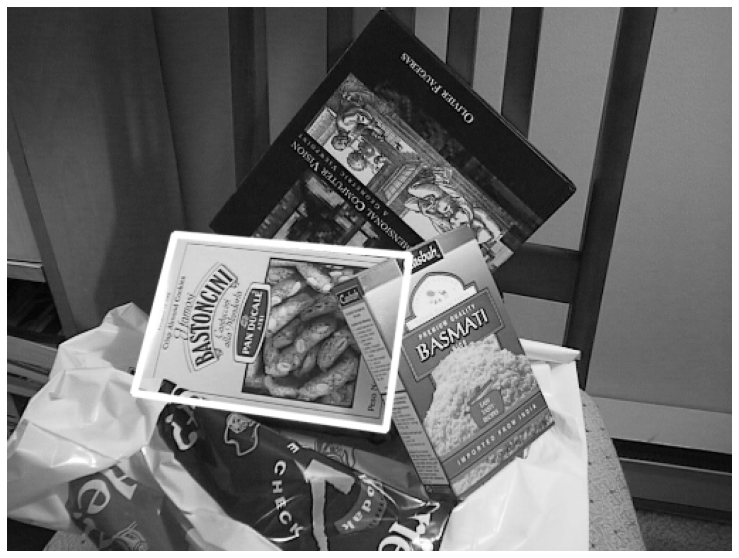

In [27]:
# Display the object
img2 = cv2.polylines(gray2, [np.int32(dst)], True, (255), 3, cv2.LINE_AA)
plt.figure(figsize=(20, 10))
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

`outImg	=	cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImg, matchColor, singlePointColor, matchesMask, flags)`
- `input`
  - `img1`:	First source image.
  - `keypoints1`:	Keypoints from the first source image.
  - `img2`:	Second source image.
  - `keypoints2`:	Keypoints from the second source image.
  - `matches1to2`:	Matches from the first image to the second one
  - `outImg`:	Output image. if this is not None, algorithm overwrite results to dst
  - `matchColor`: Color of matches (lines). -1 means random color
  - `singlePointColor`:	Color of single keypoints (circles). -1 means random color
  - `matchesMask`: Mask determining which matches are drawn. If the mask is empty, all matches are drawn.
  - `flags`: Flags setting drawing features. Possible flags bit values are defined by DrawMatchesFlags.
    - DEFAULT = 0,
    - DRAW_OVER_OUTIMG = 1,
    - NOT_DRAW_SINGLE_POINTS = 2,
    - DRAW_RICH_KEYPOINTS = 4

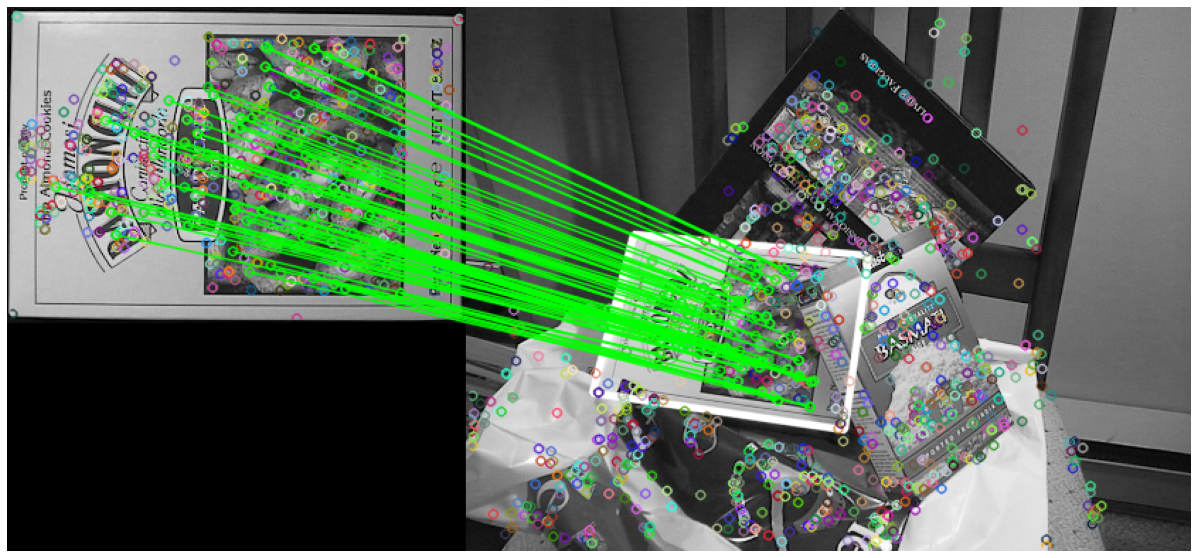

In [28]:
# Draw the inlier points matched by RANSAC
img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, good_matches, None, (0,255,0), -1, matchesMask, 0)
plt.figure(figsize=(40, 10))
plt.imshow(img3)
plt.axis('off')
plt.show()

---

# **Practice - SIFT Image stitching**

In the practice you make a mosaic of two maps using SIFT Feature matching.

- Extract SIFT features of two images.
- Match SIFT features using `cv2.BFMatcher()`. L2 distance is good enough find the transformation.
- Find the perspective transform of two images using `cv2.findHomography()`.
- Draw two images with one image warped to the another one.

Here's the desired output.

<img src="https://drive.google.com/uc?id=1BpaYtQCwHOm96jtNvNvpgxNnPxz8VYdj">

In [29]:
!wget -O river1.jpg "https://drive.google.com/u/1/uc?id=10IsGYbLT4-2Q-kR-f0YuTJiTsG6_D320&export=download"
!wget -O river2.jpg "https://drive.google.com/u/1/uc?id=1dCtTzOTw6ytTB3Kb0M-KW2HXK6hBtKDH&export=download"

--2022-05-17 06:57:33--  https://drive.google.com/u/1/uc?id=10IsGYbLT4-2Q-kR-f0YuTJiTsG6_D320&export=download
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.102, 142.251.8.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=10IsGYbLT4-2Q-kR-f0YuTJiTsG6_D320&export=download [following]
--2022-05-17 06:57:33--  https://drive.google.com/uc?id=10IsGYbLT4-2Q-kR-f0YuTJiTsG6_D320&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pvgnjptfrq5k8mpvekkhoqg6aiho11l5/1652770650000/03995330158540788625/*/10IsGYbLT4-2Q-kR-f0YuTJiTsG6_D320?e=download [following]
--2022-05-17 06:57:34--  https://doc-08-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mb

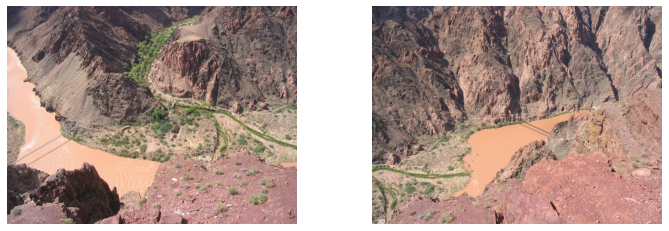

In [30]:
# Open and show the input images
img1 = Image.open('river1.jpg')
img2 = Image.open('river2.jpg')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.show()

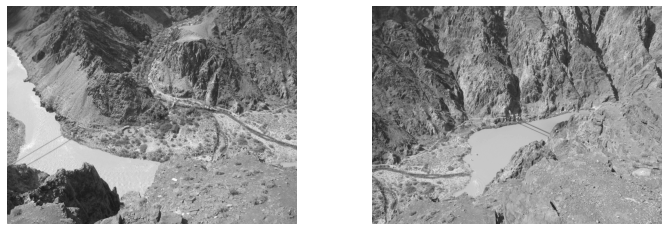

In [31]:
gray1 = img1.convert('L')
gray2 = img2.convert('L')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
img1 = np.asarray(img1)
img2 = np.asarray(img2)

gray1 = np.asarray(gray1)
gray2 = np.asarray(gray2)

In [33]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Image 1 - 8859 feature detected
Image 2 - 9346 feature detected


In [34]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

8859 matches
1352 matches


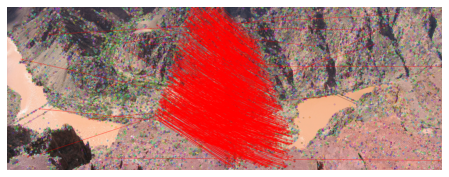

In [35]:
# Display SIFT matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, matchColor = (255, 0, 0))
plt.figure(figsize=(9,3))
plt.imshow(img3)
plt.axis('off')
plt.show()

In [36]:
trans_x = 0
trans_y = 500
trans = np.float32([[1, 0, trans_x], [0, 1, trans_y], [0, 0, 1]])

To combine transforms, use matrix multiplication

`combined_transform = np.matmul(2nd_transform, 1st_transform)`

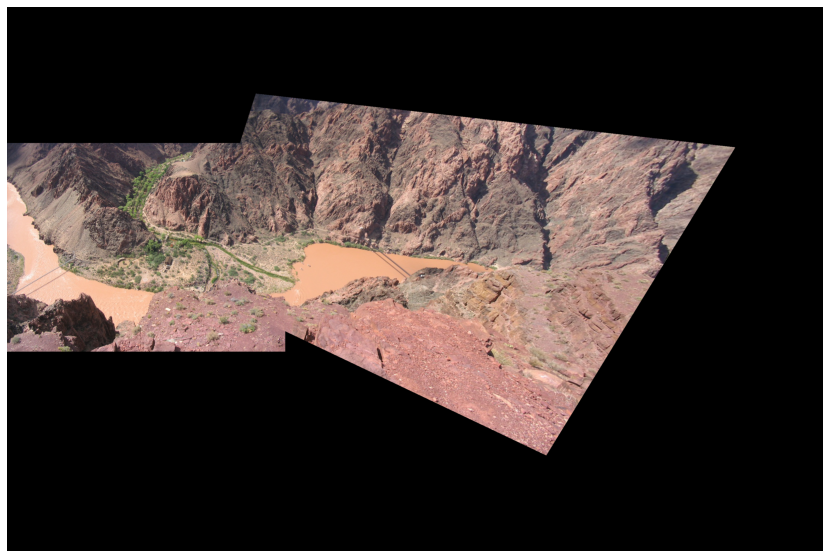

In [37]:
# Output mosaic
out = np.zeros((2000,3000,3),dtype=np.uint8)
# The first image translated
out = cv2.warpPerspective(img1, trans, (3000, 2000), out, borderMode=cv2.BORDER_TRANSPARENT)

# Fill code below to find the homography between two images and warp the second image over 'out'
# Note that the transformation should be composition of perspective and translation.
#================ YOUR CODE HERE ===================

# Points matched by cv2.
img1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
img2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

H, mask = cv2.findHomography(img2_pts, img1_pts, cv2.RANSAC, 5.0)
out = cv2.warpPerspective(img2, np.matmul(trans, H), (3000, 2000), out, borderMode=cv2.BORDER_TRANSPARENT)

#===================================================
plt.figure(figsize=(20, 10))
plt.imshow(out)
plt.axis('off')
plt.show()

## Recent works on local feature descriptors

### NetVLAD (CVPR 2016)

NetVLAD: CNN architecture for weakly supervised place recognition

* Problem formulation

![](https://www.di.ens.fr/willow/research/netvlad/images/teaser.png)

* Approach

![](https://www.di.ens.fr/willow/research/netvlad/images/vlad_cnn.png)


### SuperPoint (CVPRw 2018)

SuperPoint: Self-Supervised Interest Point Detection and Description
[(link)](https://openaccess.thecvf.com/content_cvpr_2018_workshops/papers/w9/DeTone_SuperPoint_Self-Supervised_Interest_CVPR_2018_paper.pdf)

![](https://github.com/rpautrat/SuperPoint/raw/master/doc/hp-v_280.png)

### Patch-NetVlad (CVPR 2021)

Patch-NetVLAD: Multi-Scale Fusion of Locally-Global Descriptors for Place Recognition

![](https://github.com/QVPR/Patch-NetVLAD/raw/main/assets/patch_netvlad_method_diagram.png)
